# Лабораторная работа №1 (вариант №4)

##Задание

1. Решите 3 задачи по вариантам, используя пример решения задачи.
2. Составьте алгоритмы решения задач.
3. Напишите программы на Python для решения задач.

##Импорт библиотек

In [215]:
import math

In [216]:
!pip install sympy

In [217]:
import sympy as smp
import sympy.stats as syms

##Задача №1 (6)

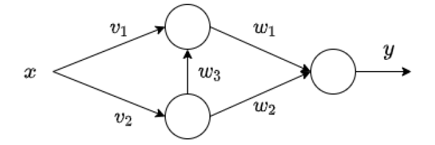

Нейронная сеть, схема которой изображена на рисунке, обучается с использованием стохастического градиентного спуска с параметром скорости обучения $\alpha = 0.2$.

Активационная характеристика выходного нейрона – сигмоида:

\begin{align}
  f = \frac{1}{1 + \mathrm{e}^{-h}},
\end{align}

активационные характеристики остальных нейронов имеют вид:

\begin{align}
  f_1 =
      \left[
        \begin{gathered}
          h, h \geq 0 \\
          0, h < 0 \\
        \end{gathered}
      \right.
\end{align}


На текущей итерации обучения τ синаптические коэффициенты нейронов сети приняли значения $v_1=v_2=w_1=w_3$, $w_2=-2$, смещения всех нейронов нулевые. На вход сети подается обучающий пример $x=1$, которому соответствует желаемое значение выхода $\sigma=0$. Проведите одну итерацию обучения сети с бинарной кросс-энтропийной функцией потерь $L(v_1)=-(\sigma ln(y)+(1-\sigma)ln(1-y))$ и рассчитайте значение синаптического коэффициента $v_1$ после его подстройки.

###Алгоритм решения



1.   Вычислить значение $y$ на текущей итерации согласно приведенной схеме.
2.   Сравнить вычисленное значение $y$ c желаемым значением выхода $\sigma$. Если значения $y$ и $\sigma$ не совпадают, необходимо выполнить подстройку весовых коэффициентов (п. 3).
4. Уравнение подстройки коэффициентов в соответствии с методом стохастического градиентного спуска:

\begin{align}
  v_1(\tau + 1) = v_1(\tau) - \alpha\frac{\partial L(v_1(\tau))}{\partial v_1}.
\end{align}

Необходимо вычислить значения частных производных и подставить их в уравнение, таким образом посчитав значение коэффициента $v_1$ на следующей итерации.


###Решение

1. Вычислим значение $y$ на текущей итерации при подаче на его вход примера $x=1$.

\begin{align}
  & y = f(w_1 y_1 + w_2 y_2) \\
  & y_1 = f_1(x v_1 + w_3 y_2) \\
  & y_2 = f_1(x v_2)
\end{align}

Подставим параметры:

\begin{align}
  & y_2 = f_1(1 \cdot 1) = 1 \\
  & y_1 = f_1(1 \cdot 1 + 1 \cdot 1) = 2 \\
  & y = f((-2) \cdot 1 + 1 \cdot 2) = f(0) = \frac{1}{2}
\end{align}

2.   Сравним вычисленное значение $y$ c желаемым значением выхода $\sigma$. Так как $y = 0.5 \neq \sigma = 0$, необходимо выполнить подстройку весовых коэффициентов (п. 3).
4. Уравнение подстройки коэффициентов в соответствии с методом стохастического градиентного спуска:

\begin{align}
  v_1(\tau + 1) = v_1(\tau) - \alpha\frac{\partial L(v_1(\tau))}{\partial v_1}.
\end{align}

Необходимо вычислить значения частных производных и подставить их в уравнение, таким образом посчитав значение коэффициента $v_1$ на следующей итерации.

\begin{align}
 \frac{\partial L(v_1(\tau))}{\partial v_1} = \frac{\partial }{\partial v_1}\bigg[-(\sigma ln(y)+(1-\sigma)ln(1-y))\bigg]
 = -\frac{\partial ln(1-y)}{\partial v_1}
 = - \frac{1}{1-y} \frac{\partial y}{\partial v_1}
 = - \frac{1}{1-\frac{1}{1 + \mathrm{e}^{-h}}} \cdot \frac{\mathrm{e}^{-h}}{(1 + \mathrm{e}^{-h})^2} \cdot w_1x,
\end{align}

где $h = x(w_1v_1+w_1w_3v_2+w_2v_2)$.

Подставляя значения переменных, таким образом получаем $\frac{\partial L(v_1(\tau))}{\partial v_1} = \frac{1}{2}$, тогда

\begin{align}
  v_1(\tau + 1) = v_1(\tau) - \alpha\frac{\partial L(v_1(\tau))}{\partial v_1} = 1 - 0.2 \cdot 0.5 = 1 - 0.1 = 0.9.
\end{align}


**Ответ:** 0.9


###Код программы

####Задание параметров

In [218]:
# создаем ассоциативный массив
# с заданными параметрами

Values = dict()

Values['sigma'] = 0
Values['x'] = 1
Values['v1'] = Values['v2'] = Values['w1'] = Values['w3'] = 1
Values['w2'] = -2

Values['alpha'] = 0.2

In [219]:
# создаем функцию активации нейронов внутреннего слоя (activation_function_internal),
# функцию активации выходного нейрона (activation_function_out)


h = smp.Symbol('h')

activation_function_out = 1 / (1 + smp.exp(-h))

activation_function_internal = smp.Piecewise((0, h < 0), (h, h >= 0 ))

display(activation_function_out, activation_function_internal)

1/(1 + exp(-h))

Piecewise((0, h < 0), (h, True))

In [220]:
# составляем выражения для вычисления значений y1, y2, y

v1, v2, w1, w2, w3 = smp.symbols('v1 v2 w1 w2 w3')
x = smp.symbols('x')

y2 = activation_function_internal.subs(h, x * v2)
y1 = activation_function_internal.subs(h, x * v1 + y2 * w3)

y = activation_function_out.subs(h, y1 * w1 + y2 * w2)
y

1/(exp(-w1*Piecewise((0, ITE(v2*x < 0, v1*x < 0, v1*x + v2*w3*x < 0)), (v1*x + w3*Piecewise((0, v2*x < 0), (v2*x, True)), True)) - w2*Piecewise((0, v2*x < 0), (v2*x, True))) + 1)

In [221]:
# составляем выражение для функции потерь

sigma = smp.symbols('sigma')

loss_function = -(sigma * smp.log(y) + (1 - sigma) * (smp.log(1 - y)))
display(loss_function)

-sigma*log(1/(exp(-w1*Piecewise((0, ITE(v2*x < 0, v1*x < 0, v1*x + v2*w3*x < 0)), (v1*x + w3*Piecewise((0, v2*x < 0), (v2*x, True)), True)) - w2*Piecewise((0, v2*x < 0), (v2*x, True))) + 1)) - (1 - sigma)*log(1 - 1/(exp(-w1*Piecewise((0, ITE(v2*x < 0, v1*x < 0, v1*x + v2*w3*x < 0)), (v1*x + w3*Piecewise((0, v2*x < 0), (v2*x, True)), True)) - w2*Piecewise((0, v2*x < 0), (v2*x, True))) + 1))

####Вычисление значений

In [222]:
# преобразуем y в выражение, которое может быть вычислено численно,
# и вычисляем значение y от заданных параметров

y_lambdified = smp.lambdify((x, v1, v2, w1, w2, w3), y)
y_lambdified(Values['x'], Values['v1'], Values['v2'], Values['w1'], Values['w2'], Values['w3'])

0.5

In [223]:
# вычисляем значение производной функции потерь при заданных параметров

loss_function_lambdified = smp.lambdify((sigma, x, v1, v2, w1, w2, w3), loss_function.diff(v1))
LF_diff = loss_function_lambdified(Values['sigma'], Values['x'], Values['v1'], Values['v2'], Values['w1'], Values['w2'], Values['w3'])
LF_diff

0.5

In [224]:
# формульный вид частной производной функции потерь по параметру v1

loss_function.diff(v1)

-sigma*w1*Piecewise((0, ITE(v2*x < 0, v1*x < 0, v1*x + v2*w3*x < 0)), (x, True))*exp(-w1*Piecewise((0, ITE(v2*x < 0, v1*x < 0, v1*x + v2*w3*x < 0)), (v1*x + w3*Piecewise((0, v2*x < 0), (v2*x, True)), True)) - w2*Piecewise((0, v2*x < 0), (v2*x, True)))/(exp(-w1*Piecewise((0, ITE(v2*x < 0, v1*x < 0, v1*x + v2*w3*x < 0)), (v1*x + w3*Piecewise((0, v2*x < 0), (v2*x, True)), True)) - w2*Piecewise((0, v2*x < 0), (v2*x, True))) + 1) + w1*(1 - sigma)*Piecewise((0, ITE(v2*x < 0, v1*x < 0, v1*x + v2*w3*x < 0)), (x, True))*exp(-w1*Piecewise((0, ITE(v2*x < 0, v1*x < 0, v1*x + v2*w3*x < 0)), (v1*x + w3*Piecewise((0, v2*x < 0), (v2*x, True)), True)) - w2*Piecewise((0, v2*x < 0), (v2*x, True)))/((1 - 1/(exp(-w1*Piecewise((0, ITE(v2*x < 0, v1*x < 0, v1*x + v2*w3*x < 0)), (v1*x + w3*Piecewise((0, v2*x < 0), (v2*x, True)), True)) - w2*Piecewise((0, v2*x < 0), (v2*x, True))) + 1))*(exp(-w1*Piecewise((0, ITE(v2*x < 0, v1*x < 0, v1*x + v2*w3*x < 0)), (v1*x + w3*Piecewise((0, v2*x < 0), (v2*x, True)), True))

In [225]:
# пересчитываем v_11 по заданной формуле

v1_new = Values['v1'] - Values['alpha'] * LF_diff
v1_new

0.9

In [226]:
y_lambdified(Values['x'], v1_new, Values['v2'], Values['w1'], Values['w2'], Values['w3'])

0.47502081252106

##Задача №2 (2)

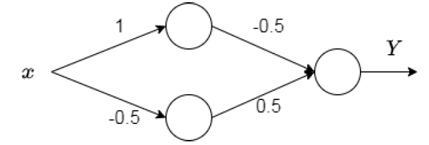

На вход нейронной сети со стохастическими нейронами (схема и синаптические коэффициенты сети изображены на рисунке, смещения всех нейронов сети нулевые), подается некоторое неслучайное число $x$.

Выход каждого стохастического нейрона – это дискретная случайная величина, описываемая распределением

\begin{align}
  P[Y=-1] = 1 - p(h),
  P[Y=1] = p(h),
\end{align}

где $Y$ – выход нейрона, $h$ – потенциал (активация) нейрона.
Найдите математическое ожидание выхода сети при подаче на ее вход значения $x=1$, если

\begin{align}
  p(h) =
      \left[
        \begin{aligned}
          & 0, h \leq -1 \\
          & 0.5(h+1), -1 < h \leq 1 \\
          & 1, h > 1 \\
        \end{aligned}
      \right.
\end{align}

###Алгоритм решения

1. По формуле математического ожидания дискретной СВ находим математическое значение $Y$:

\begin{align}
  M[Y] = P[Y=-1] \cdot (-1) + P[Y=1] \cdot (1) = 2M[p(H)] - 1,
\end{align}

где $H = w_1 Y_1 + w2 Y_2$ — случайная величина, следовательно, $p(H)$ также будет являться случайной величиной.

2. Найдем математическое ожидание $p(H)$. Чтобы это сделать, сначала составим распределение вероятностей для СВ $H$ (п. 3).

3. Подставляя в формулу для $H$ различные варианты значений Y, находим всевозможные значения СВ $H$. Выписываем соответствующие значениям вероятности, используя теоремы о сложении и умножении вероятностей.

4. Распределение вероятностей для значений $p(H = H_i)$ будет таким же, как для $H$. Тогда по формуле матожидания дискретной СВ


\begin{align}
  M[p(H)] = \sum_{i=1}^n p(H = H_i) P[H = H_i]$.
\end{align}

5. Подставляем полученное матожидание в формулу из п.1 и вычисляем значение $M[Y]$.

###Решение

1. По формуле математического ожидания дискретной СВ находим математическое значение $Y$:

\begin{align}
  M[Y] = P[Y=-1] \cdot (-1) + P[Y=1] \cdot (1) = 2M[p(H)] - 1,
\end{align}

где $H = -0.5 Y_1 + 0.5 Y_2$.

2. Найдем математическое ожидание $p(H)$. Чтобы это сделать, сначала составим распределение вероятностей для СВ $H$ (п. 3).

3. Подставляя в формулу для $H$ различные варианты значений Y, находим всевозможные значения СВ $H$. Выписываем соответствующие значениям вероятности, используя теоремы о сложении и умножении вероятностей, получаем:

\begin{align}
  P[H] =
      \left[
        \begin{aligned}
          & P[Y_1 = 1] \cdot P[Y_2 = -1], H = -1 \\
          & P[Y_1 = -1] \cdot P[Y_2 = -1]
            +  P[Y_1 = 1] \cdot P[Y_2 = 1], H = 0 \\
          & P[Y_1 = -1] \cdot P[Y_2 = 1], H = 1 \\
        \end{aligned}
      \right.
      =
      \left[
        \begin{aligned}
          & p(v_1 x) \cdot (1 - p(v_2 x)), H = -1 \\
          & (1 - p(v_1 x)) \cdot (1 - p(v_2 x))
            +  p(v_1 x) \cdot p(v_2 x), H = 0 \\
          & (1 - p(v_1 x)) \cdot p(v_2 x), H = 1 \\
        \end{aligned}
      \right.
      =
      \left[
        \begin{aligned}
          & 0.75, H = -1 \\
          & 0.25, H = 0 \\
          & 0, H = 1 \\
        \end{aligned}
      \right.
\end{align}

4. Распределение вероятностей для значений $p(H = H_i)$ будет таким же, как для $H$.

\begin{align}
  P[p(H)] =
      \left[
        \begin{aligned}
          & 0.75, p(H = -1) = 0 \\
          & 0.25, p(H = 0) = 0.5 \\
          & 0, p(H = 1) = 1 \\
        \end{aligned}
      \right.
\end{align}


Тогда по формуле матожидания дискретной СВ


\begin{align}
  M[p(H)] = 0.75 \cdot 0 + 0.25 \cdot 0.5 + 0 \cdot 1 = 0.125.
\end{align}

5. Подставляем полученное матожидание в формулу из п.1 и вычисляем значение $M[Y]$:

\begin{align}
  M[Y] = 2M[p(H)] - 1 = 2 \cdot 0.125 - 1 = -0.75.
\end{align}


**Ответ:** -0.75

###Код программы

####Задание параметров

In [227]:
# создаем ассоциативный массив
# с заданными параметрами

Values = dict()

Values['x'] = 1
Values['v1'] = 1
Values['v2'] = -0.5
Values['w1'] = -0.5
Values['w2'] = 0.5

In [228]:
# создаем функцию p(h)

h = smp.Symbol('h')

p = smp.Piecewise(
    (0, h <= -1),
    (0.5*(h + 1), ((h > -1) & (h <= 1))),
    (1, h > 1)
  )

display(p)

Piecewise((0, h <= -1), (0.5*h + 0.5, h <= 1), (1, True))

In [229]:
# преобразуем p(h) в выражение, которое может быть вычислено численно,
# и вычисляем значение p(0.5)

p_lambdified = smp.lambdify(h, p)
p_lambdified(0)

array(0.5)

####Вычисление значений

In [230]:
# пусть h1 и h2 - это выражения, которые
# подаются на вход функции p(H) нейронов Y1 и Y2 соответственно

v1, v2 = smp.symbols('v1 v2')
x = smp.Symbol('x')

h1 = v1 * x
h2 = v2 * x

In [231]:
# вычисляем значение p(h1)

P_Y1 = p.subs(h, h1)

P_Y1_lambdified = smp.lambdify((x, v1), P_Y1)
P_Y1_lambdified(Values['x'],Values['v1'])

array(1.)

In [232]:
# создаем СВ Y1 с распределением Бернулли
# (так как фактически по заданию СВ распределены по закону Бернулли)
# выводим распределение Y1, P[Y1 = -1], вероятности каждого значения и МО Y1

Y1 = syms.Bernoulli('Y1', 1 - P_Y1_lambdified(Values['x'],Values['v1']), -1, 1)

display(syms.density(Y1))
display(syms.P(smp.Eq(Y1, -1)))
display(syms.density(Y1).dict)
display(syms.E(Y1))

BernoulliDistribution(0.0, -1, 1)

0.0

{1: 1.00000000000000, -1: 0.0}

1.00000000000000

In [233]:
# вычисляем значение p(h2)

P_Y2 = p.subs(h, h2)

P_Y2_lambdified = smp.lambdify((x, v2), P_Y2)
P_Y2_lambdified(Values['x'],Values['v2'])

array(0.25)

In [234]:
# аналогично создаем СВ Y2 с распределением Бернулли
# (так как фактически по заданию СВ распределены по закону Бернулли)
# выводим распределение Y2, P[Y2 = -1], вероятности каждого значения и МО Y2

Y2 = syms.Bernoulli('Y2', 1 - P_Y2_lambdified(Values['x'],Values['v2']), -1, 1)

display(syms.density(Y2))
display(syms.P(smp.Eq(Y2, -1)))
display(syms.density(Y2).dict)
display(syms.E(Y2))

BernoulliDistribution(0.75, -1, 1)

0.750000000000000

{1: 0.250000000000000, -1: 0.750000000000000}

-0.500000000000000

In [235]:
# создаем СВ H = w1 * Y1 + w2 * Y2

w1, w2 = smp.symbols('w1 w2')

H = w1 * Y1 + w2 * Y2
H

w1*Y1 + w2*Y2

In [236]:
# выводим распределение вероятностей для H,
# вероятность P[H = -1],
# и матожидание H

display(syms.density(H))
display(syms.P(smp.Eq(H, -1)))
display(syms.E(H))

{-w1 - w2: 0,
 -w1 + w2: 0,
 w1 - w2: 0.750000000000000,
 w1 + w2: 0.250000000000000}

Piecewise((0.25, Eq(w1*Y1 + w2*Y2, 1)), (0, True)) + Piecewise((0.75, Eq(w1*Y1 + w2*Y2, 1)), (0, True))

1.0*w1 - 0.5*w2

In [237]:
# лямбдифицируем матожидание и распределение вероятностей СВ H

# M[H]
E_H_lambdified = smp.lambdify((w1, w2), syms.E(H))
# P[H]
density_H_lambdified = smp.lambdify((w1, w2), syms.density(H))

# выводим M[H] и P[H] для заданных параметров w1 и w2
display(E_H_lambdified(Values['w1'],Values['w2']))
display(density_H_lambdified(Values['w1'],Values['w2']))

-0.75

{0.0: 0.25, 1.0: 0, -1.0: 0.75}

In [238]:
# создаем массив распределения вероятностей для СВ p(H)
# для этого нужно вычислить значения p(H = H_i), а вероятности оставить
# такими же, как для H_i

density = {}

for key in density_H_lambdified(Values['w1'],Values['w2']):
  density[float(p_lambdified(key))] = density_H_lambdified(Values['w1'],Values['w2'])[key]

# выводим полученный массив
density

{0.5: 0.25, 1.0: 0, 0.0: 0.75}

In [239]:
# создаем СВ p(H) с распределением density

P_H = syms.FiniteRV('P_H', density)

In [240]:
# выводим MO для p(H)

display(syms.E(P_H))

0.125000000000000

In [241]:
# выводим плотность p(H)

display(syms.density(P_H))

FiniteDistributionHandmade({0.0: 0.75, 0.5: 0.25, 1.0: 0})

In [242]:
# создаем случайную величину Y и выводим её распределение вероятностей

P_Y = syms.E(P_H)

Y = syms.Bernoulli('Y', 1 - P_Y, -1, 1)
syms.density(Y)

BernoulliDistribution(0.875, -1, 1)

In [243]:
# вычисляем МО Y

E_Y = syms.E(Y)

display(E_Y)

-0.750000000000000

##Задача №3 (1)

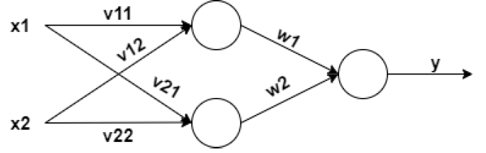

Многослойная нейронная сеть, схема которой изображена на рисунке, обучается с использованием стохастического градиентного спуска с параметром скорости обучения $\alpha = 0.1$.

Активационная характеристика выходного нейрона линейная, активационные характеристики остальных нейронов имеют вид:

\begin{align}
  f =
      \left[
        \begin{gathered}
          h, h \geq 0 \\
          -h, h < 0 \\
        \end{gathered}
      \right.
\end{align}


На текущей итерации обучения $\tau$ синаптические коэффициенты нейронов сети приняли значения $v_{12} = v_{21} = w_1 = w_2 = 1$, $v_{11} = v_{22} = 2$, смещения всех нейронов нулевые. На вход сети подается обучающий пример $x_1 = 1, x_2 = -1$, которому соответствует желаемое значение выхода $\sigma = 3$. Проведите одну итерацию обучения сети с квадратичной функцией потерь $L(v_1) = \frac{1}{2}(\sigma - y)^2$ и рассчитайте значение синаптического коэффициента $v_{11}$ после его подстройки.

###Алгоритм решения

1.   Вычислить значение $y$ на текущей итерации согласно приведенной схеме.
2.   Сравнить вычисленное значение $y$ c желаемым значением выхода $\sigma$. Если значения $y$ и $\sigma$ не совпадают, необходимо выполнить подстройку весовых коэффициентов (п. 3).
4. Уравнение подстройки коэффициентов в соответствии с методом стохастического градиентного спуска:

\begin{align}
  v_{11}(\tau + 1) = v_{11}(\tau) - \alpha\frac{\partial L(v_{11}(\tau))}{\partial v_{11}}.
\end{align}

Необходимо вычислить значения частных производных и подставить их в уравнение, таким образом посчитав значение коэффициента $v_{11}$ на следующей итерации.

###Решение

1. Вычислим значение $y$ на текущей итерации при подаче на его вход примера $x_1=1, x_2 = -1$.

\begin{align}
  & y = w_1 y_1 + w_2 y_2 \\
  & y_1 = f(v_{11}x_1 + v_{12}x_2) \\
  & y_2 = f(v_{21}x_1 + v_{22}x_2)
\end{align}

Подставим параметры:

\begin{align}
  & y_1 = f(2 \cdot 1 + 1 \cdot (-1)) = f(1) = 1 \\
  & y_2 = f(1 \cdot 1 + 2 \cdot (-1))  = f(-1) = 1 \\
  & y = 1 \cdot 1 + 1 \cdot 1 = 2
\end{align}

2.   Сравним вычисленное значение $y$ c желаемым значением выхода $\sigma$. Так как $y = 2 \neq \sigma = 3$, необходимо выполнить подстройку весовых коэффициентов (п. 3).
4. Уравнение подстройки коэффициентов в соответствии с методом стохастического градиентного спуска:

\begin{align}
  v_{11}(\tau + 1) = v_{11}(\tau) - \alpha\frac{\partial L(v_{11}(\tau))}{\partial v_{11}}.
\end{align}

Необходимо вычислить значения частных производных и подставить их в уравнение, таким образом посчитав значение коэффициента $v_{11}$ на следующей итерации.

\begin{align}
 \frac{\partial L(v_{11}(\tau))}{\partial v_{11}} = \frac{\partial }{\partial v_{11}}\bigg[\frac{1}{2}(\sigma - y)^2\bigg] = (\sigma - y)\frac{\partial (\sigma - y)}{\partial v_{11}} = -(\sigma - y)\frac{\partial y}{\partial v_{11}} = -(\sigma - y)x_1.
\end{align}


Таким образом, $\frac{\partial L(v_1(\tau))}{\partial v_1} = -(3-2) \cdot 1 = -1$, тогда

\begin{align}
  v_{11}(\tau + 1) = v_{11}(\tau) - \alpha\frac{\partial L(v_{11}(\tau))}{\partial v_{11}} = 2 - 0.1 \cdot (-1) = 2 + 0.1 = 2.1.
\end{align}


**Ответ:** 2.1

###Код программы

####Задание параметров

In [244]:
# создаем ассоциативный массив
# с заданными параметрами

Values = dict()

Values['sigma'] = 3

Values['X'] = [1, -1]

Values['V'] = [[2, 1], [1, 2]]

Values['W'] = [1, 1]

Values['alpha'] = 0.1

In [245]:
# создаем функцию активации нейронов внутреннего слоя (activation_function_internal)

h = smp.Symbol('h')

activation_function_internal = smp.Piecewise((-h, h < 0), (h, h >= 0 ))

display(activation_function_internal)

Piecewise((-h, h < 0), (h, True))

In [246]:
# составляем выражения для вычисления
# значения y1, y2, y,
# выводим их в формульном виде

v11, v12, v21, v22, w1, w2 = smp.symbols('v11 v12 v21 v22 w1 w2')
x1, x2 = smp.symbols('x1 x2')

y2 = activation_function_internal.subs(h, v11 * x1 + v12 * x2)
y1 = activation_function_internal.subs(h, v21 * x1 + v22 * x2)

y = y1 * w1 + y2 * w2
display(y1, y2, y)

Piecewise((-v21*x1 - v22*x2, v21*x1 + v22*x2 < 0), (v21*x1 + v22*x2, True))

Piecewise((-v11*x1 - v12*x2, v11*x1 + v12*x2 < 0), (v11*x1 + v12*x2, True))

w1*Piecewise((-v21*x1 - v22*x2, v21*x1 + v22*x2 < 0), (v21*x1 + v22*x2, True)) + w2*Piecewise((-v11*x1 - v12*x2, v11*x1 + v12*x2 < 0), (v11*x1 + v12*x2, True))

In [247]:
# создаем функцию потерь L

sigma = smp.symbols('sigma')

loss_function = (1/2) * (sigma - y)**2
display(loss_function)

0.5*(sigma - w1*Piecewise((-v21*x1 - v22*x2, v21*x1 + v22*x2 < 0), (v21*x1 + v22*x2, True)) - w2*Piecewise((-v11*x1 - v12*x2, v11*x1 + v12*x2 < 0), (v11*x1 + v12*x2, True)))**2

####Вычисление значений

In [248]:
# преобразуем y в выражение, которое может быть вычислено численно,
# и вычисляем значение y от заданных параметров

y_lambdified = smp.lambdify((x1, x2, v11, v12, v21, v22, w1, w2), y)
y_lambdified(
    Values['X'][0],
    Values['X'][1],
    Values['V'][0][0],
    Values['V'][0][1],
    Values['V'][1][0],
    Values['V'][1][1],
    Values['W'][0],
    Values['W'][1]
  )

2.0

In [249]:
# вычисляем значение производной функции потерь при заданных параметров

loss_function_lambdified = smp.lambdify((sigma, x1, x2, v11, v12, v21, v22, w1, w2), loss_function.diff(v11))
LF_diff = loss_function_lambdified(
    Values['sigma'],
    Values['X'][0],
    Values['X'][1],
    Values['V'][0][0],
    Values['V'][0][1],
    Values['V'][1][0],
    Values['V'][1][1],
    Values['W'][0],
    Values['W'][1]
    )

LF_diff

-1.0

In [250]:
# пересчитываем v_11 по заданной формуле

v11_new = Values['V'][0][0] - Values['alpha'] * LF_diff
v11_new

2.1